In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
from src.preprocessing import preprocess_file
from sklearn.metrics import silhouette_score

In [23]:
SEED = 42

In [24]:
data = pd.read_csv("data/dc_file_modified2.csv")

/tmp/ipykernel_32016/2490620789.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data/dc_file_modified2.csv")


In [25]:
data = data.sample(10_000, random_state=SEED)
data = preprocess_file(data)

In [26]:
# range from 1 to 10 by 0.5
eps_range = np.arange(0.1, 1, 0.1)
min_samples_range = range(3, 6)

param_grid = {
    "eps": eps_range,
    "min_samples": min_samples_range
},

param_comb = ParameterGrid(param_grid)

In [27]:
results = []

for i, params in enumerate(param_comb):
    print(f"testing params {i+1}/{len(param_comb)}")

    model = DBSCAN(**params)
    model.fit(data)

    labels = model.labels_

    number_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    number_of_noise_points = list(labels).count(-1)
    noise_points_ratio = number_of_noise_points / len(labels)
    silhouette = silhouette_score(data, labels)
    
    result = {
        "number_of_clusters": number_of_clusters,
        "number_of_noise_points": number_of_noise_points,
        "noise_points_ratio": noise_points_ratio,
        "silhouette": silhouette
    }

    results.append(result)

testing params 1/27
testing params 2/27
testing params 3/27
testing params 4/27
testing params 5/27
testing params 6/27
testing params 7/27
testing params 8/27
testing params 9/27
testing params 10/27
testing params 11/27
testing params 12/27
testing params 13/27
testing params 14/27
testing params 15/27
testing params 16/27
testing params 17/27
testing params 18/27
testing params 19/27
testing params 20/27
testing params 21/27
testing params 22/27
testing params 23/27
testing params 24/27
testing params 25/27
testing params 26/27
testing params 27/27


Text(0, 0.5, 'Silhouette')

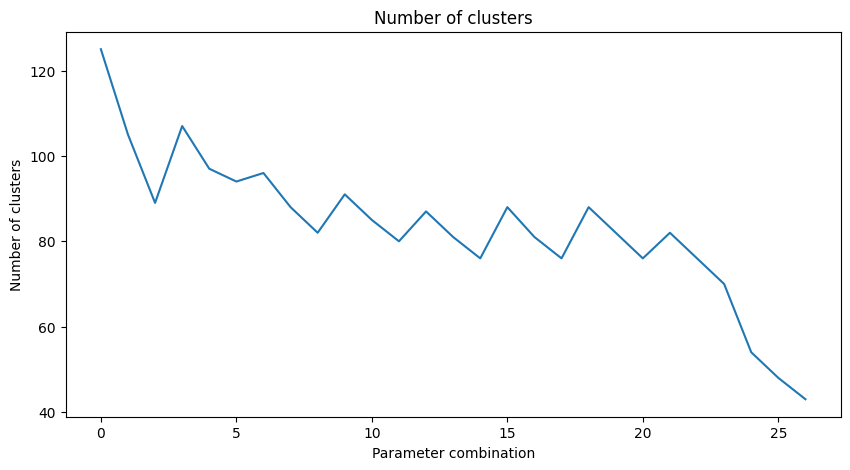

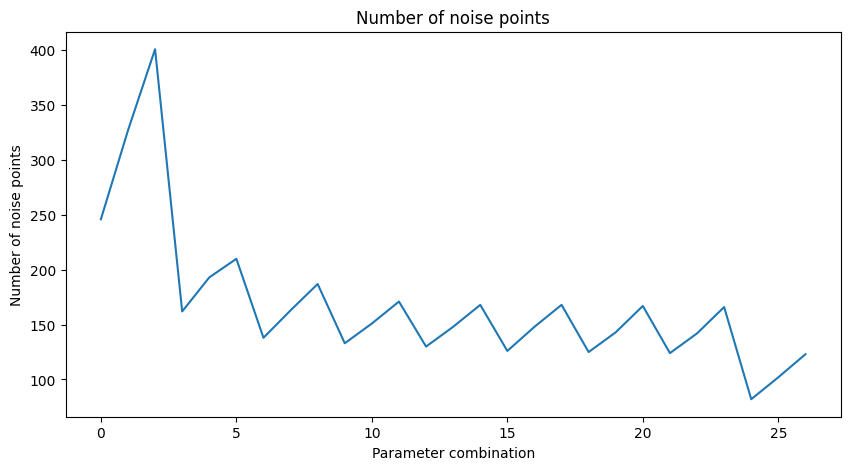

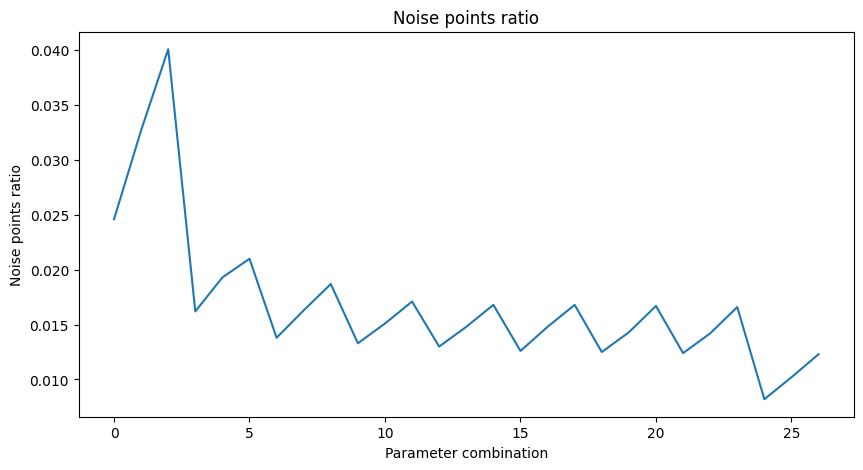

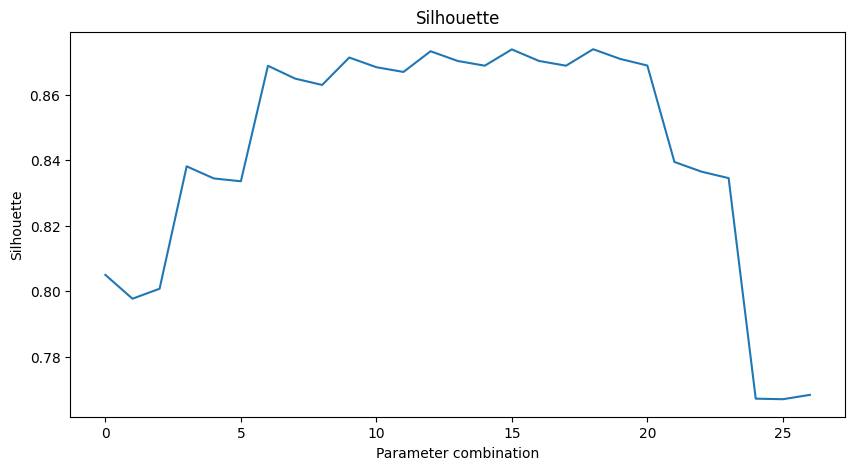

In [28]:
# plot number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(len(results)), [result["number_of_clusters"] for result in results])
plt.title("Number of clusters")
plt.xlabel("Parameter combination")
plt.ylabel("Number of clusters")

# plot number of noise points
plt.figure(figsize=(10, 5))
plt.plot(range(len(results)), [result["number_of_noise_points"] for result in results])
plt.title("Number of noise points")
plt.xlabel("Parameter combination")
plt.ylabel("Number of noise points")

# plot noise points ratio
plt.figure(figsize=(10, 5))
plt.plot(range(len(results)), [result["noise_points_ratio"] for result in results])
plt.title("Noise points ratio")
plt.xlabel("Parameter combination")
plt.ylabel("Noise points ratio")

# plot silhouette
plt.figure(figsize=(10, 5))
plt.plot(range(len(results)), [result["silhouette"] for result in results])
plt.title("Silhouette")
plt.xlabel("Parameter combination")
plt.ylabel("Silhouette")

Počet clusterů se pohybuje okolo 90. Velikost šumu se pohybuje okolo 1.5 %. To je přijatelné.

Proto volíme takovou kombinaci, která dává nejvyšší silhouette score.

In [29]:
best_combination = param_comb[np.argmax([result["silhouette"] for result in results])]
print(f"Best combination: {best_combination}")

Best combination: {'min_samples': 3, 'eps': 0.7000000000000001}
